
# Project: US Gun Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Through analyzing the gun data provided by FBI and US Census Data to find the trend of gun purchases and the relationship between gun purchases and census data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
census = pd.read_csv('U.S. Census Data.csv')
gun = pd.read_excel('gun_data.xlsx')

In [3]:
census.info() # Check data type of columns in census data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [4]:
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [5]:
# There are 85 rows and 52 columns in census data.
# The 52 columns represent each state, plus 'fact' and 'fact note'.
# Based on the result of info(), all the data type are object, but they actually contains number and percentage.
# The object data needed to be converted into numeric type for grouping and calculation in data exploring step.
# Also,'fact note' has 52 NaN value out of 80 'fact' rows. Will remove 'fact note' for data consistency.


In [6]:
gun.info() # Check data type of columns in gun data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [7]:
gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [8]:
# Based on the info function of gun data, gun data has a total of 12485 rows. Some columns has 12485 entries, like 'month','state','total'. Some only has a few non-null values, like 'permit_recheck'.
# Overall, 'totals' should be the sum up of all the previous columns starting from 'permit'.
# The number of guns should be integer instead of float. The data type should be converted from float to int.

<a id='wrangling'></a>
## Data Wrangling

### Step 1: Replace the Nan field with mean of each column for gun data
### Step 2: Drop "fact note" column in census data
### Step 3: Convert data type from object to float for all the state columns of census data
### Step 4: Extract year and month data from column "month" in gun data
### Step 5: Convert data type from float to integer for all the types of check columns of gun data

In [9]:
# Step 1: Replace the Nan field with mean of each column for gun data  
gun= gun.fillna(gun.mean(), axis=0, inplace=True)

In [10]:
# check the result of replacing in Census data
gun.isnull().sum().sum() # This returns an integer of the total number of NaN values, 0 is right


0

In [11]:
# Step 2: Drop fact Note column
census = census.drop('Fact Note',axis=1)

In [12]:
# Step 3: Convert data type from object to float for all the state columns of census data
# Assign all states into a list 
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',  
        'Hawaii', 'Idaho', 'Illinois','Indiana', 'Iowa', 'Kansas', 
        'Kentucky', 'Louisiana', 'Maine','Maryland', 'Massachusetts', 
        'Michigan','Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon','Pennsylvania', 
        'Rhode Island', 'South Carolina','South Dakota', 'Tennessee', 'Texas', 'Utah', 
        'Vermont','Virginia', 'Washington', 'West Virginia','Wisconsin', 'Wyoming']


In [13]:
# Convert data type to float and ignore the nan value
# Using census.dtypes to check result, The result shows all the state columns's data type now is float32. 
for state in states:
    census[state].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
    census[state] = pd.to_numeric(census[state], downcast='float', errors='ignore')
census.dtypes  

Fact               object
Alabama           float32
Alaska            float32
Arizona           float32
Arkansas          float32
California        float32
Colorado          float32
Connecticut       float32
Delaware          float32
Florida           float32
Georgia           float32
Hawaii            float32
Idaho             float32
Illinois          float32
Indiana           float32
Iowa              float32
Kansas            float32
Kentucky          float32
Louisiana         float32
Maine             float32
Maryland          float32
Massachusetts     float32
Michigan          float32
Minnesota         float32
Mississippi       float32
Missouri          float32
Montana           float32
Nebraska          float32
Nevada            float32
New Hampshire     float32
New Jersey        float32
New Mexico        float32
New York          float32
North Carolina    float32
North Dakota      float32
Ohio              float32
Oklahoma          float32
Oregon            float32
Pennsylvania

In [14]:
# Step 4: Extract year and month from column Month in gun data and convert data type from string to numeric 
# Assign the data before '-' in month column to year 
gun['year'] = gun['month'].apply(lambda x: x.split("-")[0]).astype(int)
gun['year'].unique()

#Assign the data after '-' in month column to year column
gun['month_only'] = gun['month'].apply(lambda x: x.split("-")[1]).astype(int)
gun['month_only'].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10])

In [15]:
# Use gun.head() to check 
gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,month_only
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017,9
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017,9
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017,9
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017,9
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017,9


In [16]:
# Step 5: Convert data type from float to integer for all the types of check columns of gun data
# Assign all sub columns to a list 
cols = ['permit', 'permit_recheck', 'handgun','long_gun','other','admin','prepawn_handgun','prepawn_long_gun',            
'prepawn_other','redemption_handgun', 'redemption_long_gun','redemption_other','returned_handgun','returned_long_gun' ,          
'returned_other','rentals_handgun', 'rentals_long_gun', 'private_sale_handgun' , 'private_sale_long_gun',        
'private_sale_other', 'return_to_seller_handgun',  'return_to_seller_long_gun','return_to_seller_other']

# Convert the column name in cols list into int64 format 
gun[cols] = gun[cols].applymap(np.int64)


In [17]:
# Using gun.info() to check
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 29 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12485 non-null int64
permit_recheck               12485 non-null int64
handgun                      12485 non-null int64
long_gun                     12485 non-null int64
other                        12485 non-null int64
multiple                     12485 non-null int64
admin                        12485 non-null int64
prepawn_handgun              12485 non-null int64
prepawn_long_gun             12485 non-null int64
prepawn_other                12485 non-null int64
redemption_handgun           12485 non-null int64
redemption_long_gun          12485 non-null int64
redemption_other             12485 non-null int64
returned_handgun             12485 non-null int64
returned_long_gun            12485 non-null int64
returned_other               12485 non-

<a id='eda'></a>
## Exploratory Data Analysis


### Overall Trend of Gun Purchase

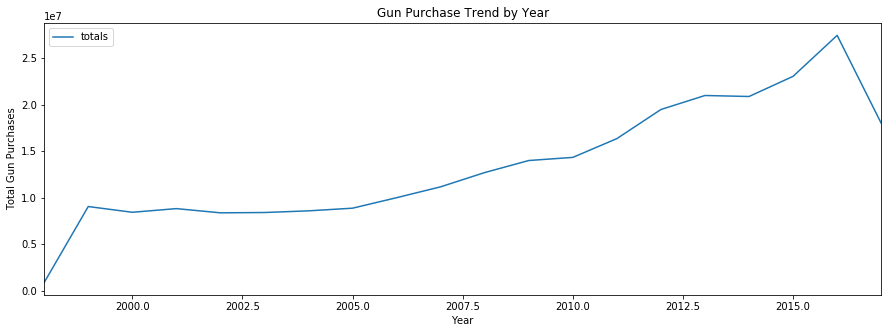

In [18]:
# Create a line plot for gun purchase to explore the overall trend

#1 Create line chart using grouped data by year, which can be used to observe the overall trend
plt.figure(figsize=(15,5))
gun.groupby('year')['totals'].sum().plot(kind='line')
# set x and y axis lable name
plt.xlabel('Year')
plt.ylabel('Total Gun Purchases')
plt.legend()
plt.title("Gun Purchase Trend by Year")
plt.show()


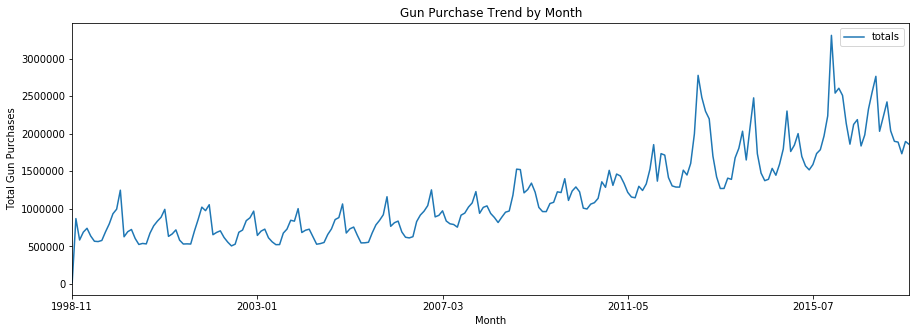

In [19]:
#2 Create line chart using grouped data by month, which can be used to observe the change over the season
plt.figure(figsize=(15,5))
gun.groupby('month')['totals'].sum().plot(kind='line')
# set x and y axis lable name
plt.xlabel('Month')
plt.ylabel('Total Gun Purchases')
plt.legend()
plt.title("Gun Purchase Trend by Month")
plt.show()

In [20]:
# Observations:
# 1. From "Gun Purchase Trend by Year", from 1998-11 to 2017-09, the  overall trend of gun purchase is increasing. 
# 2. From 1998 to 2005, the number of annual gun purchases keeps stable at 10 million nationwide.
# 3. From 2005 to 2016, the number of annual gun purchases increases from 10 million to 27 million.
# 4. Since 2017 only has records of the first nine months, it shows a drop.
# 5. From "Gun Purchase Trend by Month", the number of monthly gun purchases varies month to month.
# 6. It shows a similar seasonal pattern year over year with an overall increasing trend, like the Year Trend.
# 7. The peak season of gun purchases falls into the second-half each year. The number starts to climb in July and reaches the peak around December and keeps decreasing in the first-half year to the yearly lowest number around July. 


### Gun per Capita

In [21]:
# Transpose Census data and remove the index on Fact
census.set_index('Fact',inplace=True)
census_T = census.T.reset_index()

In [22]:
# Rename the column name from index to state to match the column name in gun data. 
census_T.rename(columns={'index':'state'},inplace = True)

In [23]:
census_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 86 columns):
state                                                                                     50 non-null object
Population estimates, July 1, 2016,  (V2016)                                              50 non-null float32
Population estimates base, April 1, 2010,  (V2016)                                        50 non-null float32
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     50 non-null float32
Population, Census, April 1, 2010                                                         50 non-null float32
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    50 non-null float32
Persons under 5 years, percent, April 1, 2010                                             50 non-null float32
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   50 non-null float32
Persons under 18 y

In [24]:
# Assign all the columns into a list
cols_T = ['Population estimates, July 1, 2016,  (V2016)', 
          'Population estimates base, April 1, 2010,  (V2016)',
          'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
          'Population, Census, April 1, 2010', 
          'Persons under 5 years, percent, July 1, 2016,  (V2016)',
          'Persons under 5 years, percent, April 1, 2010', 
          'Persons under 18 years, percent, July 1, 2016,  (V2016)',
          'Persons under 18 years, percent, April 1, 2010',
          'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
          'Persons 65 years and over, percent, April 1, 2010', 
          'Female persons, percent,  July 1, 2016,  (V2016)',
          'Female persons, percent, April 1, 2010',
          'White alone, percent, July 1, 2016,  (V2016)',
          'Black or African American alone, percent, July 1, 2016,  (V2016)',
          'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
          'Asian alone, percent, July 1, 2016,  (V2016)',
          'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
          'Two or More Races, percent, July 1, 2016,  (V2016)',
          'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
          'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)', 
          'Veterans, 2011-2015',
          'Foreign born persons, percent, 2011-2015',
          'Housing units,  July 1, 2016,  (V2016)',
          'Housing units, April 1, 2010',
          'Owner-occupied housing unit rate, 2011-2015',
          'Median value of owner-occupied housing units, 2011-2015',
          'Median selected monthly owner costs -with a mortgage, 2011-2015',
          'Median selected monthly owner costs -without a mortgage, 2011-2015',
          'Median gross rent, 2011-2015',
          'Building permits, 2016',
          'Households, 2011-2015',
          'Persons per household, 2011-2015',
          'Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015',
          'Language other than English spoken at home, percent of persons age 5 years+, 2011-2015',
          'High school graduate or higher, percent of persons age 25 years+, 2011-2015',
          'With a disability, under age 65 years, percent, 2011-2015',
          'Persons  without health insurance, under age 65 years, percent',
          'In civilian labor force, total, percent of population age 16 years+, 2011-2015',
          'In civilian labor force, female, percent of population age 16 years+, 2011-2015',
          'Total accommodation and food services sales, 2012 ($1,000)',
          'Total health care and social assistance receipts/revenue, 2012 ($1,000)',
          'Total manufacturers shipments, 2012 ($1,000)',
          'Total merchant wholesaler sales, 2012 ($1,000)',
          'Total retail sales, 2012 ($1,000)',
          'Total retail sales per capita, 2012',
          'Mean travel time to work (minutes), workers age 16 years+, 2011-2015',
          'Median household income (in 2015 dollars), 2011-2015',
          'Per capita income in past 12 months (in 2015 dollars), 2011-2015',
          'Persons in poverty, percent',
          'Total employer establishments, 2015',
          'Total employment, 2015',
          'Total annual payroll, 2015 ($1,000)',
          'Total employment, percent change, 2014-2015',
          'Total nonemployer establishments, 2015',
          'All firms, 2012',
          'Men-owned firms, 2012',
          'Women-owned firms, 2012',
          'Minority-owned firms, 2012',
          'Nonminority-owned firms, 2012',
          'Veteran-owned firms, 2012',
          'Nonveteran-owned firms, 2012',
          'Population per square mile, 2010',
          'Land area in square miles, 2010']

# Convert the columns in cols_T list into float format 
for state in cols_T:
    census_T[state].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
    census_T[state] = pd.to_numeric(census_T[state], downcast='float', errors='ignore')
census_T.dtypes 



Fact
state                                                                                     object
Population estimates, July 1, 2016,  (V2016)                                             float32
Population estimates base, April 1, 2010,  (V2016)                                       float32
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    float32
Population, Census, April 1, 2010                                                        float32
Persons under 5 years, percent, July 1, 2016,  (V2016)                                   float32
Persons under 5 years, percent, April 1, 2010                                            float32
Persons under 18 years, percent, July 1, 2016,  (V2016)                                  float32
Persons under 18 years, percent, April 1, 2010                                           float32
Persons 65 years and over, percent,  July 1, 2016,  (V2016)                              float32
Persons 65 years and over

In [25]:
# Get subset data for 2016 and 2010
gun_16=gun[gun['year'] == 2016]
gun_10=gun[gun['year'] == 2010]

In [26]:
# Group by gun data by state and gun totals for 2010 and 2016 
guntotal_16= gun_16.groupby(['state'])['totals'].sum().reset_index()
guntotal_10= gun_10.groupby(['state'])['totals'].sum().reset_index()

In [27]:
# Rename the dataset to represent different time point 
guntotal_16.rename(columns={'totals':'2016_totals'},inplace = True)
guntotal_10.rename(columns={'totals':'2010_totals'},inplace = True)


In [28]:
# Merge 2010 and 2016 gun data summary 
guntotal = guntotal_16.merge(guntotal_10, on='state', how='inner')

In [29]:
# Merge gun and census data with inner join, by state column 
result = guntotal.merge(census_T, on='state', how='inner')

In [30]:
# Calculate Gun_Per_Capital for 2016
result['Gun_Per_Capital_2016'] = result['2016_totals']/ result['Population estimates, July 1, 2016,  (V2016)']


In [31]:
# Calculate Gun_Per_Capital for 2010
result['Gun_Per_Capital_2010'] = result['2010_totals']/ result['Population estimates base, April 1, 2010,  (V2016)']



In [32]:
# List the highest 5 state per capital in 2010
result.nlargest(5,'Gun_Per_Capital_2010')

,state,2016_totals,2010_totals,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,-,D,F,FN,nan,S,X,Z,Gun_Per_Capital_2016,Gun_Per_Capital_2010
16,Kentucky,3676847,2385579,4436974.0,4339344.0,220.0,4339367.0,620.0,650.0,2280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.828683,0.549756
43,Utah,294907,553134,3051217.0,2763888.0,1040.0,2763885.0,830.0,950.0,3020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096652,0.200129
25,Montana,136337,101095,1042520.0,989414.0,540.0,989415.0,600.0,630.0,2180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130776,0.102177
1,Alaska,87647,65909,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118140,0.092797
47,West Virginia,242350,159550,1831102.0,1853011.0,120.0,1852994.0,550.0,560.0,2050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.132352,0.086103


In [33]:
# List the highest 5 state per capital in 2016
result.nlargest(5,'Gun_Per_Capital_2016')

,state,2016_totals,2010_totals,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,-,D,F,FN,nan,S,X,Z,Gun_Per_Capital_2016,Gun_Per_Capital_2010
16,Kentucky,3676847,2385579,4436974.0,4339344.0,220.0,4339367.0,620.0,650.0,2280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.828683,0.549756
13,Indiana,1436725,345650,6633053.0,6484136.0,230.0,6483802.0,640.0,670.0,2380.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.216601,0.053307
12,Illinois,1924070,695300,12801539.0,12831574.0,20.0,12830632.0,600.0,650.0,2290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.150300,0.054187
47,West Virginia,242350,159550,1831102.0,1853011.0,120.0,1852994.0,550.0,560.0,2050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.132352,0.086103
25,Montana,136337,101095,1042520.0,989414.0,540.0,989415.0,600.0,630.0,2180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130776,0.102177


In [34]:
# Observations:
# 1. Kentucky, Montana, and West Virginia has the highest gun per capita in both Jul 2016 and Apr 2010 data on average.
# 2. Among all the states in United States, Kentucky has the highest gun per capita in both Jul 2016 and Apr 2010 data.
# 3. Kentucky, Indiana, Illinois, West Virginia, and Montana are the top 5 states with the highest gun per capita in Jul 2016.
# 4. Kentucky, Utah, Montana, Alaska, and West Virginia are the top 5 states with the highest gun per capita in Apr 2010.

### Gun Registration Growth over States

In [35]:
# Calculate the increasing percentage of gun registrations from 2010 to 2016
result['gun_growth'] = result['2016_totals']/(result['2016_totals']-result['2010_totals'])

In [36]:
# Get the biggest growth percentage 
result['gun_growth'].max() 

4.031971662526451

In [37]:
# List Top 5 rows by gun growth rate descending
result.nlargest(5,'gun_growth')

,state,2016_totals,2010_totals,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,D,F,FN,nan,S,X,Z,Gun_Per_Capital_2016,Gun_Per_Capital_2010,gun_growth
1,Alaska,87647,65909,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118140,0.092797,4.031972
49,Wyoming,63594,47709,585501.0,563767.0,390.0,563626.0,650.0,710.0,2370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108615,0.084625,4.003399
25,Montana,136337,101095,1042520.0,989414.0,540.0,989415.0,600.0,630.0,2180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130776,0.102177,3.868594
15,Kansas,196548,144156,2907289.0,2853129.0,190.0,2853118.0,670.0,720.0,2460.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067605,0.050526,3.751489
3,Arkansas,266014,191448,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.089020,0.065654,3.567497


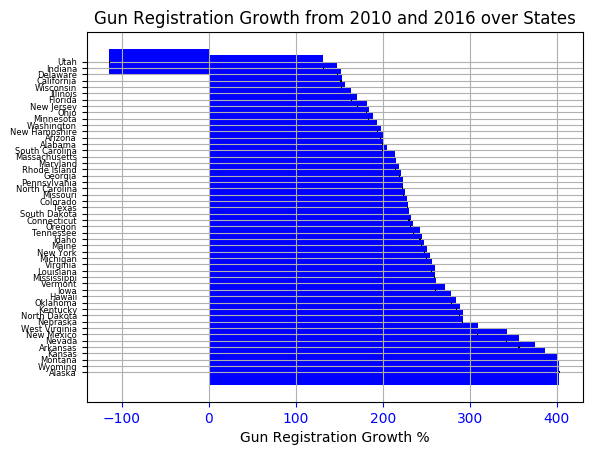

In [38]:
# Create Bar chart for every states' gun growth 
plt.figure(figsize=(30,30))
plt.rcdefaults()
fig, ax = plt.subplots()

# Sort result data by gun_growth value
sorted = result.sort_values(by=['gun_growth'])

# Create bar chart 
y_pos = np.arange(len(sorted['state']))
error = np.random.rand(len(sorted['state']))
ax.barh(y_pos, (sorted['gun_growth']*100), xerr=error, align='center',height=4,linewidth=4,color='blue', ecolor='black')

# Set x and y axis lable and make the label readable
ax.set_yticks(y_pos)
ax.set_xlabel("Gun Registration Growth %")
ax.set_yticklabels(sorted['state'],size=6)

# Invert x and y axis
ax.invert_yaxis()  

# Set tick colors:
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='black')

# Set the title
plt.title("Gun Registration Growth from 2010 and 2016 over States")     
plt.grid(True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [39]:
# Observations:
# 1. Alaska reported the highest growth rate in gun registrations during 2010 to 2016 by 403%.
# 2. The top 5 states with the highest growth rate in gun registrations are Alaska, Wyoming, Montana, Kansas, and Arkansas during 2010 to 2016.
# 3. Alaskas and Wyoming are only two state whose growth more than 400%.
# 4. Utah and Indiana are the only two states with gun registration during this period decreasing by over 100%. 
# 5. Most states have growth rate in gun regiatration between 100% to 300% during 2010 to 2016. 


<a id='conclusions'></a>
## Conclusions

> Through joining the two independent tables, FBI Gun Data and Census Data, by their shared attributes, states and year-month, this analysis can check the relationship between gun purchase and census variable.

> 1. From 1998-11 to 2017-09, the  overall trend of gun purchase is increasing. From 1998 to 2005, the number of annual gun purchases keeps stable at 10 million nationwide. From 2005 to 2016, the number of annual gun purchases increases from 10 million to 27 million. Since 2017 only has records of the first nine months, it shows a drop. From "Gun Purchase Trend by Month", the number of monthly gun purchases varies month to month. It shows a similar seasonal pattern year over year with an overall increasing trend, like the Year Trend. The peak season of gun purchases falls into the second-half each year. The number starts to climb in July and reaches the peak around December and keeps decreasing in the first-half year to the yearly lowest number around July. 

> 2. The gun data and census data are divided by state. However, some states/regions of US in the gun data has missing or zero values. These are District of Columbia, Guam, Mariana Islands, Puerto Rico, Virgin Islands, which of them are excluded from this analysis. Among all the remaining states, Kentucky, Montana, and West Virginia has the highest gun per capita in both Jul 2016 and Apr 2010 data on average. Kentucky has the highest in both.

> 3. Alaska reported the highest growth rate in gun registrations during 2010 to 2016 by 403%. The top 5 states with the highest growth rate are Alaska, Wyoming, Montana, Kansas, and Arkansas. Alaskas and Wyoming are only two state whose growth more than 400%. On the other hand, Utah and Indiana are the only two states with gun registration during this period decreasing by over 100%. Most states have growth rate in gun regiatration between 100% to 300% during 2010 to 2016. 


## Limitations
> Replacing gun data's missing values with mean of each columns and removing 'Fact Note' column since it has exceeding number of Nan values may contribute to some limitations to the overall result, though saving time and energy on the overall trend. Missing values can be caused by nonreponse or limitation regulation or lack of gathering data. 


In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0